In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [31]:
def resize(img, scale):
    return cv2.resize(img, (int(img.shape[1]*scale), int(img.shape[0]*scale)))

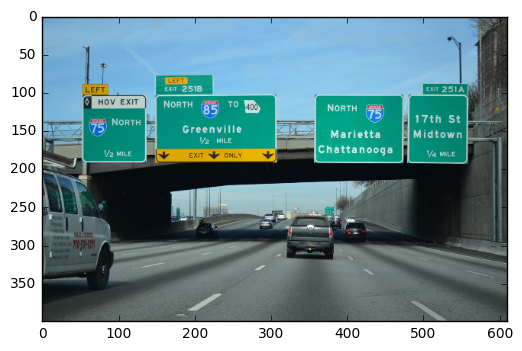

In [32]:
im = cv2.imread("multiscale_test/1010.jpg")
if im.shape[0] > 400:
    scale = 400.0/im.shape[0]
else: scale = 1
im = resize(im, scale)

rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.show()


In [76]:
#base color of guidesign: Hue 168, Saturation, 99, Value 45: Red, 0, green 115, blue 90
def preprocess(image, (lower, upper)):

    #boundary in bgr color scheme for opencv

    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")
    
    #apply smoothing
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(image,-1,kernel)

    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask

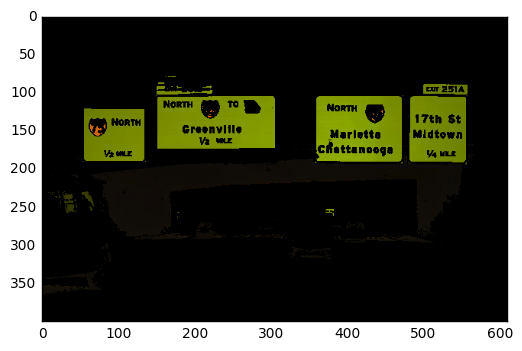

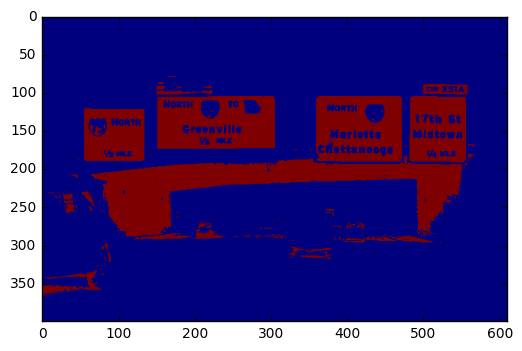

In [88]:
pimage, mask = preprocess(im,  ([10,10,0], [255, 255, 10]))
plt.imshow(pimage)
plt.show()
pimage2, mask2 = preprocess(pimage, )

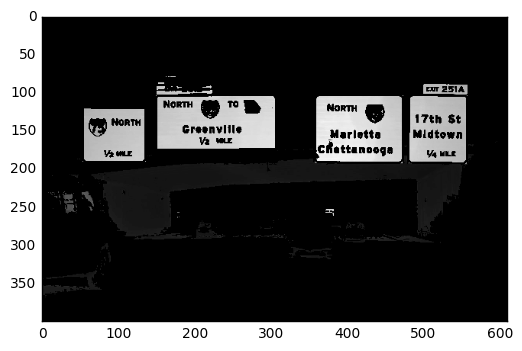

In [84]:
imgray = cv2.cvtColor(pimage,cv2.COLOR_BGR2GRAY)
plt.imshow(imgray, cmap='gray')
plt.show()

In [85]:

im2, contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

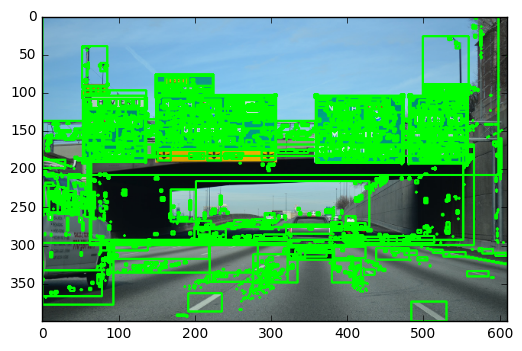

In [86]:
boxes = [cv2.boundingRect(c) for c in contours]

for x, y, w, h in boxes:
    cv2.rectangle(rgb, (x,y),(x+w, y+h), (0, 255, 0), 2)
plt.imshow(rgb)
plt.show()